In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
od.download("https://www.kaggle.com/datasets/ahmedwaelnasef/cars-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: miniproject003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmedwaelnasef/cars-dataset


100%|██████████| 111k/111k [00:00<00:00, 50.1MB/s]

In [4]:
df=pd.read_csv("/content/cars-dataset/cars.csv")

In [5]:
df.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [6]:
df.columns

Index(['car name', 'price', 'engine_capacity', 'cylinder', 'horse_power',
       'top_speed', 'seats', 'brand', 'country'],
      dtype='object')

In [7]:
df.describe()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
count,6308,6308,6308,5684,6308,6308,6308,6308,6308
unique,2546,3395,129,10,330,169,82,82,7
top,Mercedes-Benz C-Class 2022 C 300,TBD,2.0,4,150,250,5 Seater,mercedes-benz,uae
freq,10,437,1241,2856,162,1100,3471,560,1248


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


In [9]:
df.isnull().sum()

,0
car name,0
price,0
engine_capacity,0
cylinder,624
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
car name,0
price,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [12]:
df['top_speed'] = pd.to_numeric(df['top_speed'], errors='coerce')


df.dropna(subset=['top_speed'], inplace=True)


df['top_speed'] = df['top_speed'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5272 entries, 2 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         5272 non-null   object
 1   price            5272 non-null   object
 2   engine_capacity  5272 non-null   object
 3   cylinder         5272 non-null   object
 4   horse_power      5272 non-null   object
 5   top_speed        5272 non-null   int64 
 6   seats            5272 non-null   object
 7   brand            5272 non-null   object
 8   country          5272 non-null   object
dtypes: int64(1), object(8)
memory usage: 411.9+ KB


In [14]:
df['engine_capacity'] = df['engine_capacity'].astype(float)

In [15]:
df['cylinder'] = pd.to_numeric(df['cylinder'], errors='coerce')


df.dropna(subset=['cylinder'], inplace=True)


df['cylinder'] = df['cylinder'].astype(int)

In [16]:

df['horse_power']=df['horse_power'].astype(int)

In [17]:
import numpy as np
def extract_numerical_seats(value):
  if isinstance(value, float):
    if value.is_integer():
      return int(value)
    elif str(value).endswith('Seater'):
        return int(str(value).replace('Seater', ''))
    elif 'N A' in str(value):
        return np.nan
    elif 'Automatic' in str(value):
        return np.nan
    else:
      return np.nan
  else:
    try:
        return int(value.replace('Seater', '').strip())
    except ValueError:
        return np.nan

df['seats'] = df['seats'].apply(extract_numerical_seats)
df.dropna(subset=['seats'], inplace=True)
df['seats'] = df['seats'].astype(int)

In [18]:
df['price'].unique()

array(['SAR 98,785', 'Orangeburst Metallic', 'SAR 95,335', ...,
       'AED 1,500,000', 'AED 1,400,000', 'AED 1,990,000'], dtype=object)

In [19]:
def price_conversion_to_dollar_and_cleaning(value):
  if isinstance(value, str):
    if 'SAR' in value:
      price=float(value.replace('SAR', '').replace(',', ''))
      price_in_dollar=price/3.75
      return price_in_dollar
    elif 'AED' in value:
      price=float(value.replace('AED', '').replace(',', ''))
      price_in_dollar=price/3.67
      return price_in_dollar
    elif value in ['Orangeburst Metallic', 'Following', 'Clear White', 'TBD',
                       'Walnut Brown/Billet Silver', 'Sapphire Blue Metallic',
                       'Billet Silver/Walnut Brown', 'Tasman Blue', 'DISCONTINUED',
                       'Follow', 'Electric Blue/ Super Black','Mosaic Black Metallic']:
      return np.nan
    else:
      try:
        return float(value)
      except ValueError:
        return np.nan
  else:
    return float(value)

df['price'] = df['price'].apply(price_conversion_to_dollar_and_cleaning)
df.dropna(subset=['price'], inplace=True)
df['price'] = df['price'].astype(float)

In [20]:
df

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
2,Suzuki Jimny 2021 1.5L Automatic,26342.666667,1.5,4,102,145,4,suzuki,ksa
5,Honda HR-V 2021 1.8 i-VTEC EX,25422.666667,1.8,4,140,190,5,honda,ksa
8,Renault Koleos 2021 2.5L LE (4WD),31173.333333,2.5,4,170,199,5,renault,ksa
10,Suzuki Jimny 2021 1.5L M/T,24502.666667,1.5,4,102,145,4,suzuki,ksa
11,Honda HR-V 2021 1.8 i-VTEC DX,19289.333333,1.8,4,140,190,5,honda,ksa
...,...,...,...,...,...,...,...,...,...
6298,Rolls Royce Wraith 2021 6.6L Black Badge,435967.302452,6.6,12,624,250,4,rolls-royce,uae
6299,Rolls Royce Dawn 2021 6.6L V12 Black Badge,408719.346049,6.6,12,593,250,4,rolls-royce,uae
6300,Lamborghini Huracan 2021 EVO Spyder,381471.389646,5.2,10,640,325,2,lamborghini,uae
6302,Lamborghini Aventador SVJ 2021 LP770-4 Coupe,542234.332425,6.5,12,770,350,2,lamborghini,uae


In [21]:
df.columns

Index(['car name', 'price', 'engine_capacity', 'cylinder', 'horse_power',
       'top_speed', 'seats', 'brand', 'country'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'country' column
encoder.fit(df['country'])

# Transform the 'country' column
df['country_encoded'] = encoder.transform(df['country'])

# Drop the original 'country' column
df.drop(['country'], axis=1, inplace=True)

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder to the 'brand' and 'country' columns
encoder.fit(df[['brand']])

# Transform the columns and get the encoded features
encoded_features = encoder.transform(df[['brand']])

# Create column names for the encoded features
encoded_feature_names = encoder.get_feature_names_out(['brand'])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'brand' and 'country' columns
df.drop(['brand'], axis=1, inplace=True)

In [24]:
df

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,country_encoded,brand_Foton,brand_abarth,...,brand_renault,brand_rolls-royce,brand_skoda,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,brand_zna,brand_zotye
2,Suzuki Jimny 2021 1.5L Automatic,26342.666667,1.5,4,102,145,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Honda HR-V 2021 1.8 i-VTEC EX,25422.666667,1.8,4,140,190,5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Renault Koleos 2021 2.5L LE (4WD),31173.333333,2.5,4,170,199,5,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Suzuki Jimny 2021 1.5L M/T,24502.666667,1.5,4,102,145,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,Honda HR-V 2021 1.8 i-VTEC DX,19289.333333,1.8,4,140,190,5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Rolls Royce Wraith 2021 6.6L Black Badge,435967.302452,6.6,12,624,250,4,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6299,Rolls Royce Dawn 2021 6.6L V12 Black Badge,408719.346049,6.6,12,593,250,4,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6300,Lamborghini Huracan 2021 EVO Spyder,381471.389646,5.2,10,640,325,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6302,Lamborghini Aventador SVJ 2021 LP770-4 Coupe,542234.332425,6.5,12,770,350,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


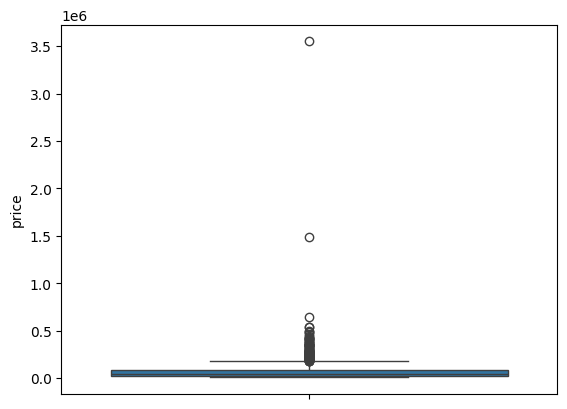

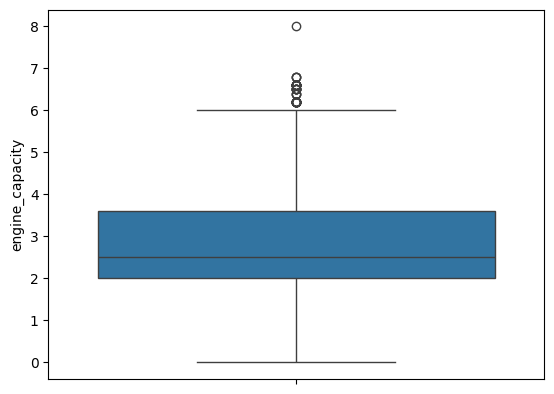

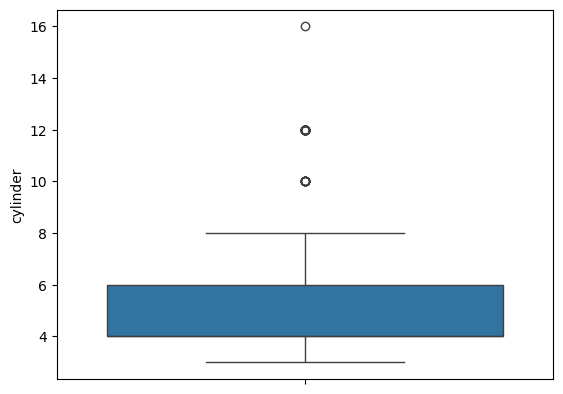

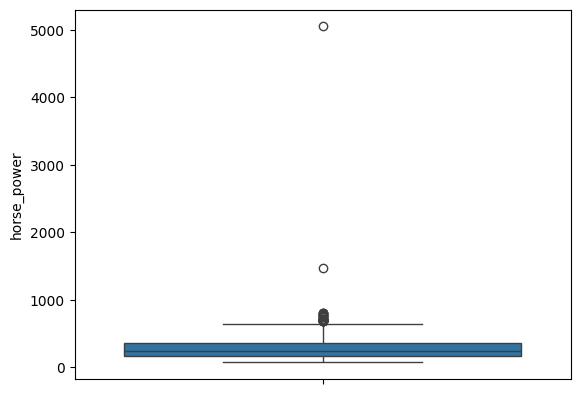

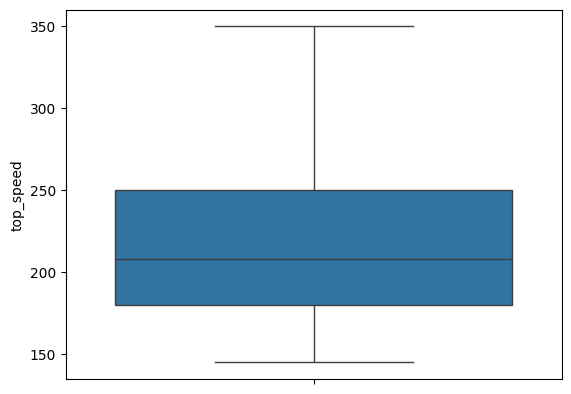

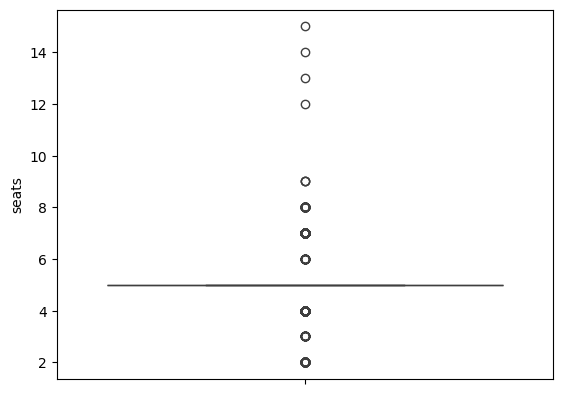

In [25]:
def check_outliers():
  column_names=['price', 'engine_capacity', 'cylinder', 'horse_power',
       'top_speed', 'seats']
  for column in column_names:
    sns.boxplot(df[column])
    plt.show()
check_outliers()

In [26]:
import pandas as pd


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


column='price'
df = remove_outliers_iqr(df, column)


In [27]:
import pandas as pd


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


column='engine_capacity'
df = remove_outliers_iqr(df, column)


In [28]:
# import pandas as pd


# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.5)
#     Q3 = df[column].quantile(0.90)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df


# column='cylinder'
# df = remove_outliers_iqr(df, column)


In [29]:
# import pandas as pd


# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df


# column='horse_power'
# df = remove_outliers_iqr(df, column)


In [30]:
# import pandas as pd


# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.20)
#     Q3 = df[column].quantile(0.80)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df


# column='seats'
# df = remove_outliers_iqr(df, column)


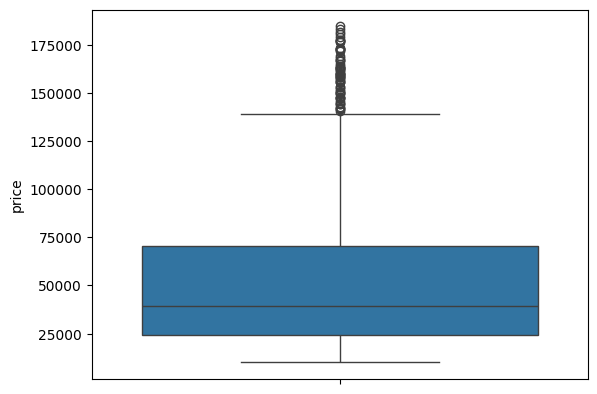

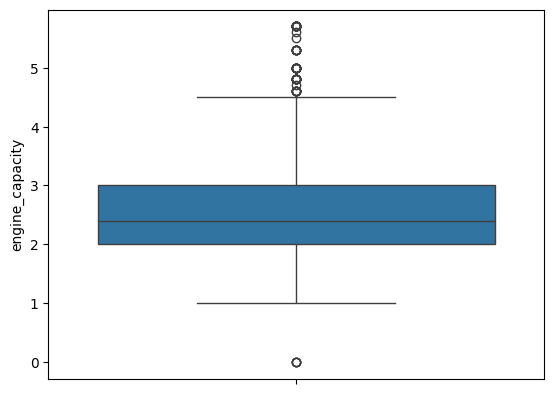

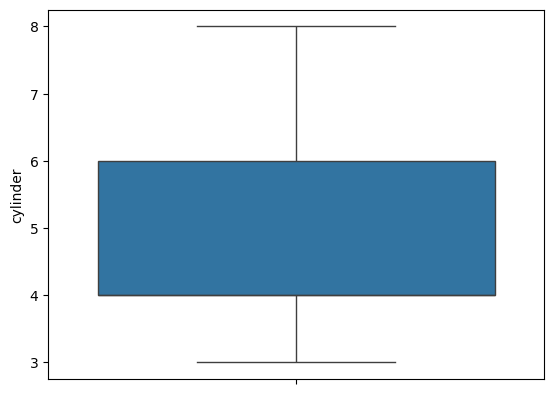

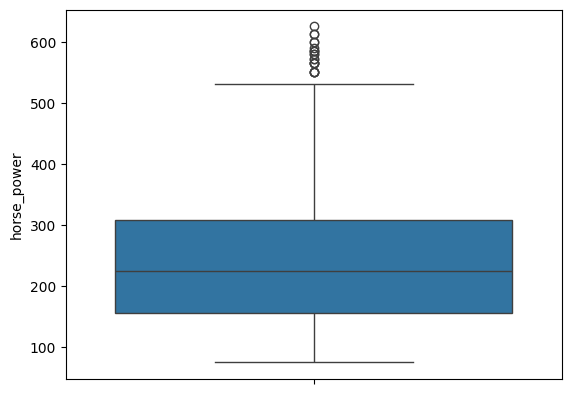

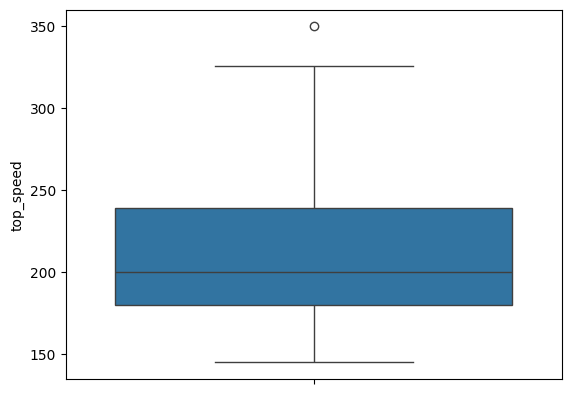

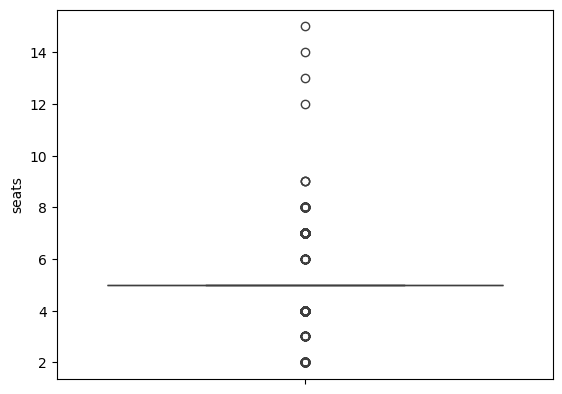

In [31]:
def check_outliers():
  column_names=['price', 'engine_capacity', 'cylinder', 'horse_power',
       'top_speed', 'seats']
  for column in column_names:
    sns.boxplot(df[column])
    plt.show()
check_outliers()

In [32]:
df.drop(['car name'], axis=1, inplace=True)

In [33]:
df.columns

Index(['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed',
       'seats', 'country_encoded', 'brand_Foton', 'brand_abarth',
       'brand_alfa-romeo', 'brand_aston-martin', 'brand_audi', 'brand_bentley',
       'brand_bestune', 'brand_bmw', 'brand_borgward', 'brand_bugatti',
       'brand_byd', 'brand_cadillac', 'brand_changan', 'brand_chery',
       'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dodge',
       'brand_ferrari', 'brand_fiat', 'brand_ford', 'brand_gac', 'brand_geely',
       'brand_genesis', 'brand_gmc', 'brand_great-wall', 'brand_haval',
       'brand_honda', 'brand_hongqi', 'brand_hyundai', 'brand_infiniti',
       'brand_isuzu', 'brand_jac', 'brand_jaguar', 'brand_jeep',
       'brand_jetour', 'brand_kia', 'brand_kinglong', 'brand_lamborghini',
       'brand_land-rover', 'brand_lexus', 'brand_lincoln', 'brand_lotus',
       'brand_mahindra', 'brand_maserati', 'brand_maxus', 'brand_mazda',
       'brand_mclaren', 'brand_mercedes-benz', 'b

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with preprocessed data

# Select features (X) and target variable (y)
X = df[['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed',
       'seats', 'country_encoded', 'brand_Foton', 'brand_abarth',
       'brand_alfa-romeo', 'brand_aston-martin', 'brand_audi', 'brand_bentley',
       'brand_bestune', 'brand_bmw', 'brand_borgward', 'brand_bugatti',
       'brand_byd', 'brand_cadillac', 'brand_changan', 'brand_chery',
       'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dodge',
       'brand_ferrari', 'brand_fiat', 'brand_ford', 'brand_gac', 'brand_geely',
       'brand_genesis', 'brand_gmc', 'brand_great-wall', 'brand_haval',
       'brand_honda', 'brand_hongqi', 'brand_hyundai', 'brand_infiniti',
       'brand_isuzu', 'brand_jac', 'brand_jaguar', 'brand_jeep',
       'brand_jetour', 'brand_kia', 'brand_kinglong', 'brand_lamborghini',
       'brand_land-rover', 'brand_lexus', 'brand_lincoln', 'brand_lotus',
       'brand_mahindra', 'brand_maserati', 'brand_maxus', 'brand_mazda',
       'brand_mclaren', 'brand_mercedes-benz', 'brand_mg', 'brand_mini',
       'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot',
       'brand_porsche', 'brand_ram', 'brand_renault', 'brand_rolls-royce',
       'brand_skoda', 'brand_subaru', 'brand_suzuki', 'brand_toyota',
       'brand_volkswagen', 'brand_volvo', 'brand_zna', 'brand_zotye']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4872638193568496e-22
R-squared: 1.0


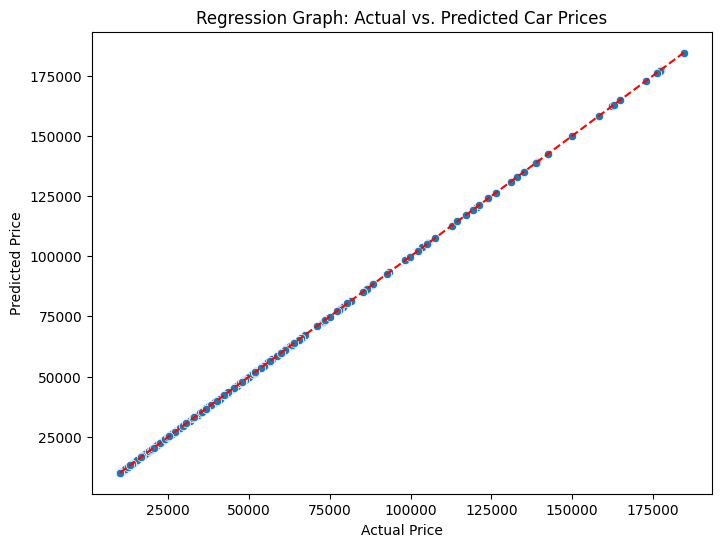

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Regression Graph: Actual vs. Predicted Car Prices")


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')


plt.show()